# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'D:\ML100DDays\data\\'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數

co = app_train.sample(150000).corr()['TARGET']
co

SK_ID_CURR                   -0.000649
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.031902
FLAG_OWN_CAR                 -0.023086
FLAG_OWN_REALTY              -0.005901
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001330
AMT_REQ_CREDIT_BUREAU_MON    -0.013615
AMT_REQ_CREDIT_BUREAU_QRT    -0.002618
AMT_REQ_CREDIT_BUREAU_YEAR    0.022480
DAYS_EMPLOYED_ANOM           -0.046625
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
print('最大15筆:')
print(co.sort_values().tail(15))
print('\n最小15筆:')
print(co.sort_values().head(15))

最大15筆:
DEF_30_CNT_SOCIAL_CIRCLE       0.034926
OWN_CAR_AGE                    0.037579
DAYS_REGISTRATION              0.040423
REG_CITY_NOT_LIVE_CITY         0.043910
FLAG_DOCUMENT_3                0.045995
FLAG_EMP_PHONE                 0.046583
REG_CITY_NOT_WORK_CITY         0.050076
DAYS_ID_PUBLISH                0.050816
DAYS_LAST_PHONE_CHANGE         0.054608
REGION_RATING_CLIENT           0.060134
REGION_RATING_CLIENT_W_CITY    0.060830
DAYS_EMPLOYED                  0.073831
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_12                    NaN
Name: TARGET, dtype: float64

最小15筆:
EXT_SOURCE_3                 -0.177701
EXT_SOURCE_2                 -0.163862
EXT_SOURCE_1                 -0.156482
DAYS_BIRTH                   -0.078834
DAYS_EMPLOYED_ANOM           -0.046625
FLOORSMAX_AVG                -0.042512
FLOORSMAX_MEDI               -0.042300
FLOORSMAX_MODE               -0.042158
AMT_GOODS_PRICE              -0.040772
REGIO

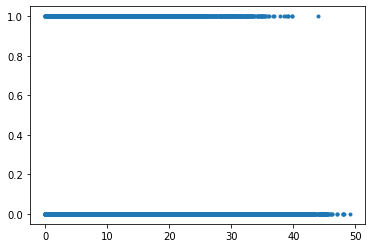

In [7]:
plt.plot(app_train['DAYS_EMPLOYED']/(-365),app_train['TARGET'],'.')
plt.show()